# **CUSTOMER CONVERSATION PREDICTION**



## **Importing libraries**

In [87]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression

# **Importing dataset**

In [88]:
data = pd.read_csv('/content/FINAL_PROJECT_1.csv')
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [89]:
#checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [90]:
# droping duplicates

data = data.drop_duplicates()


In [91]:
data.shape

(45205, 11)

In [92]:
# checking data type of columns

data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [93]:
# checking null values 

data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

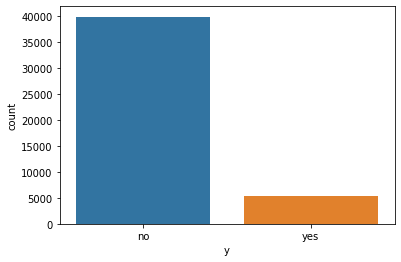

In [94]:
sns.countplot(data = data,x = 'y')

In [95]:
data['target'] = data['y'].map({'yes':1,'no':0})

In [96]:
data['job'].value_counts()


blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [97]:
data['job'] = data['job'].replace({'unknown':'blue-collar'})

In [98]:
data['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [99]:
data['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [100]:
data['education_qual'] = data['education_qual'].replace({'unknown':'secondary'})

In [101]:
data['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [102]:
data['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [103]:
data['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [104]:
data.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [105]:
data['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [106]:
data.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


In [107]:
IQR = data.age.quantile(0.75) - data.age.quantile(0.25)
upper_threshold = data.age.quantile(0.75) + (1.5*IQR)
lower_threshold = data.age.quantile(0.75) - (1.5*IQR)

lower_threshold , upper_threshold

(25.5, 70.5)

In [108]:
data['age'] = data['age'].clip(lower_threshold,upper_threshold)

In [109]:
IQR = data.dur.quantile(0.75) - data.dur.quantile(0.25)
upper_threshold = data.dur.quantile(0.75) + (1.5*IQR)
lower_threshold = data.dur.quantile(0.75) - (1.5*IQR)

lower_threshold , upper_threshold

(-5.0, 643.0)

In [110]:
data['dur'] = data['dur'].clip(lower_threshold,upper_threshold)

In [111]:
IQR = data.num_calls.quantile(0.75) - data.num_calls.quantile(0.25)
upper_threshold = data.num_calls.quantile(0.75) + (1.5*IQR)
lower_threshold = data.num_calls.quantile(0.75) - (1.5*IQR)

lower_threshold , upper_threshold

(0.0, 6.0)

In [112]:
data['num_calls'] = data['num_calls'].clip(lower_threshold,upper_threshold)

In [113]:
data.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.927032,15.80688,234.95620,2.392235,0.117000
std,10.299428,8.32234,176.75476,1.600152,0.321424
min,25.500000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,70.500000,31.00000,643.00000,6.000000,1.000000


<AxesSubplot:xlabel='y', ylabel='count'>

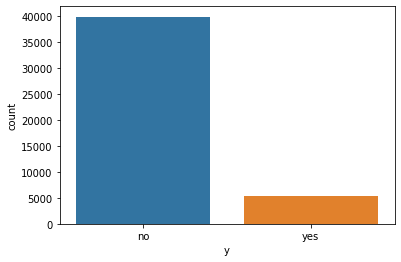

In [114]:
sns.countplot(x= 'y' , data = data)

In [115]:
data['age'] = data['age'].astype(int)
data['dur'] = data['dur'].astype(int)
data['num_calls'] = data['num_calls'].astype(int)

In [116]:
data.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.906869,15.80688,234.95620,2.392235,0.117000
std,10.306563,8.32234,176.75476,1.600152,0.321424
min,25.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,70.000000,31.00000,643.00000,6.000000,1.000000


# **EDA (exploratory data analysis)**

Number of people who take Insurance by job :


blue-collar      0.221613
management       0.209203
technician       0.168035
admin.           0.114368
services         0.091870
retired          0.050083
self-employed    0.034930
entrepreneur     0.032895
unemployed       0.028824
housemaid        0.027431
student          0.020750
Name: job, dtype: float64

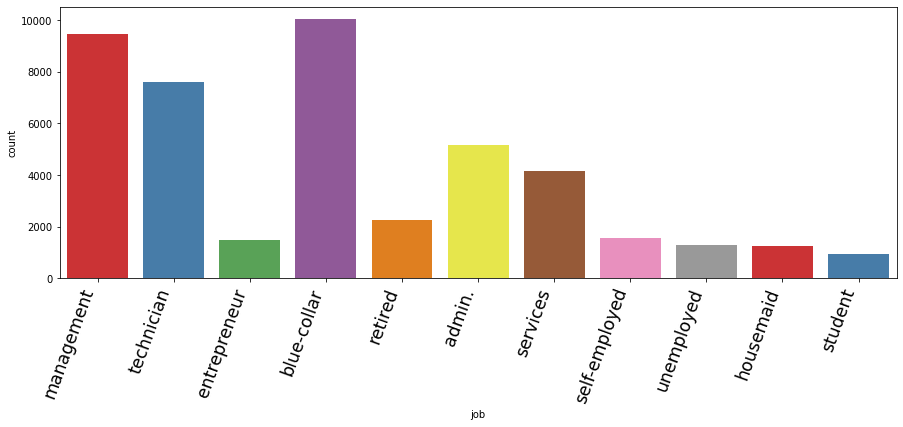

In [117]:
print('Number of people who take Insurance by job :')
plt.figure(figsize=(15,5))
sns.countplot(x = 'job',data=data,palette = 'Set1')
plt.xticks( horizontalalignment='right',fontweight='light',fontsize='xx-large',rotation = 70 ) 
data['job'].value_counts(normalize = True)

In the above feature table we see most of call are called to blue-collar, management and technicians

<AxesSubplot:ylabel='job'>

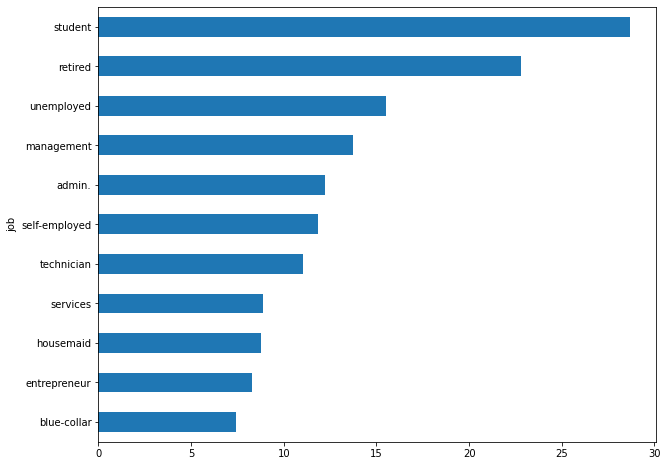

In [118]:
plt.figure(figsize=(10,8))
(data.groupby('job')['target'].mean()*100).sort_values().plot(kind = 'barh')


In the above feature vs target variables tabel we see that students, retried and unemployed are more interested to take the insurance we should focus on call the type of people to increase insurance policies 

Number of people who take Insurance by marital status :


married     0.601925
single      0.282889
divorced    0.115186
Name: marital, dtype: float64

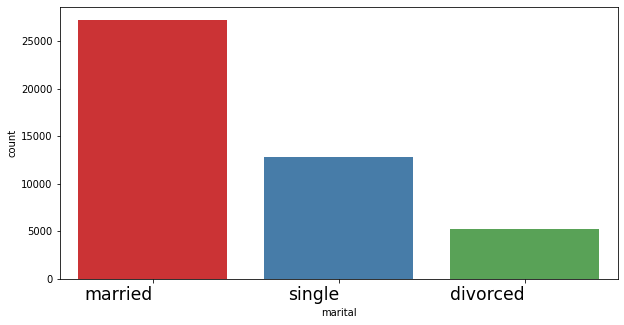

In [119]:
print('Number of people who take Insurance by marital status :')
plt.figure(figsize=(10,5))
sns.countplot(x = 'marital',data=data,palette = 'Set1')
plt.xticks( horizontalalignment='right',fontweight='light',fontsize='xx-large' ) 
data['marital'].value_counts(normalize = True)

<AxesSubplot:ylabel='marital'>

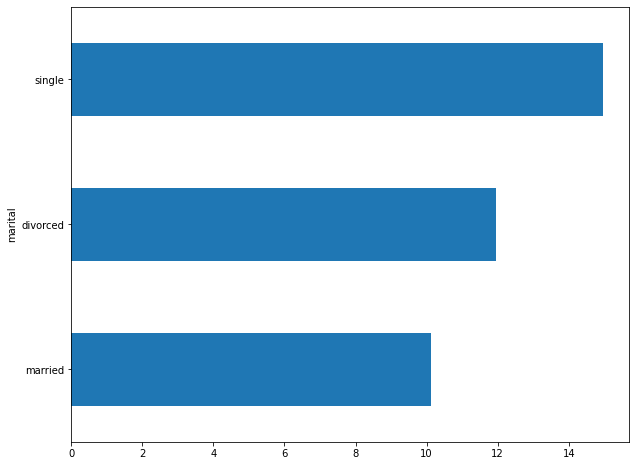

In [120]:
plt.figure(figsize=(10,8))
(data.groupby('marital')['target'].mean()*100).sort_values().plot(kind = 'barh')

1.In the feature table we see that most of the call are called to the married people but most of the insurance are coming from single we should focus on the single and divorce people 

Number of people who take Insurance by education qualification :


secondary    0.554275
tertiary     0.294193
primary      0.151532
Name: education_qual, dtype: float64

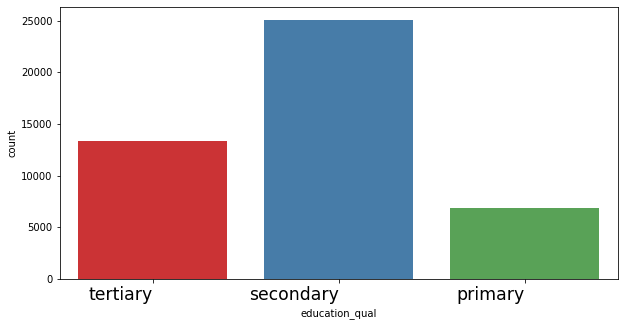

In [121]:
print('Number of people who take Insurance by education qualification :')
plt.figure(figsize=(10,5))
sns.countplot(x = 'education_qual',data=data,palette = 'Set1')
plt.xticks( horizontalalignment='right',fontweight='light',fontsize='xx-large' ) 
data['education_qual'].value_counts(normalize = True)

<AxesSubplot:ylabel='education_qual'>

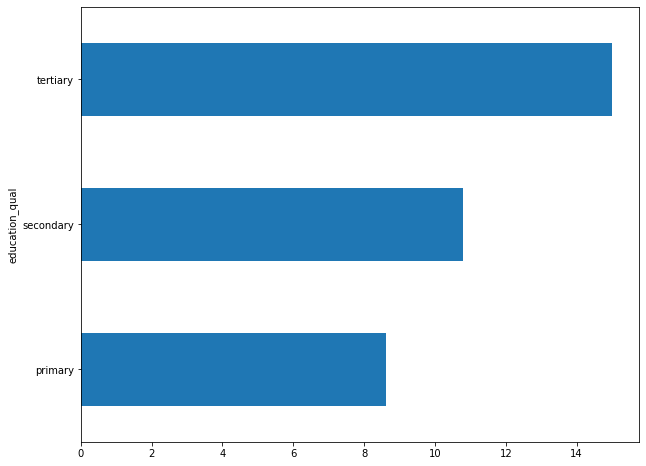

In [122]:
plt.figure(figsize=(10,8))
(data.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind = 'barh')

1. In feature table we see that most of the calls are called to secondary education people but we should focus on doing more calls to tertiary people to improvement in business 

Number of people who take Insurance by call type :


cellular     0.647760
unknown      0.287955
telephone    0.064285
Name: call_type, dtype: float64

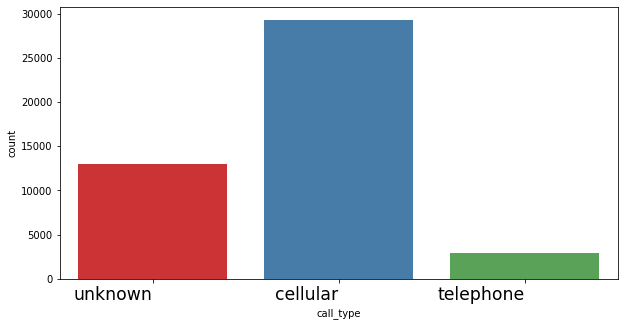

In [123]:
print('Number of people who take Insurance by call type :')
plt.figure(figsize=(10,5))
sns.countplot(x = 'call_type',data=data,palette = 'Set1')
plt.xticks( horizontalalignment='right',fontweight='light',fontsize='xx-large' ) 
data['call_type'].value_counts(normalize = True)

<AxesSubplot:ylabel='call_type'>

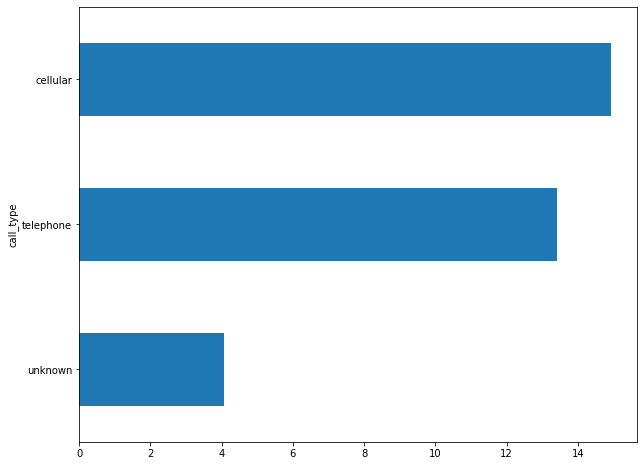

In [124]:
plt.figure(figsize=(10,8))
(data.groupby('call_type')['target'].mean()*100).sort_values().plot(kind = 'barh')

1. Most of the people are responded to cellular keep more interaction in cell phone only 

Number of people who take Insurance by month wise :


may    0.304502
jul    0.152505
aug    0.138148
jun    0.118106
nov    0.087822
apr    0.064860
feb    0.058600
jan    0.031036
oct    0.016326
sep    0.012808
mar    0.010552
dec    0.004734
Name: mon, dtype: float64

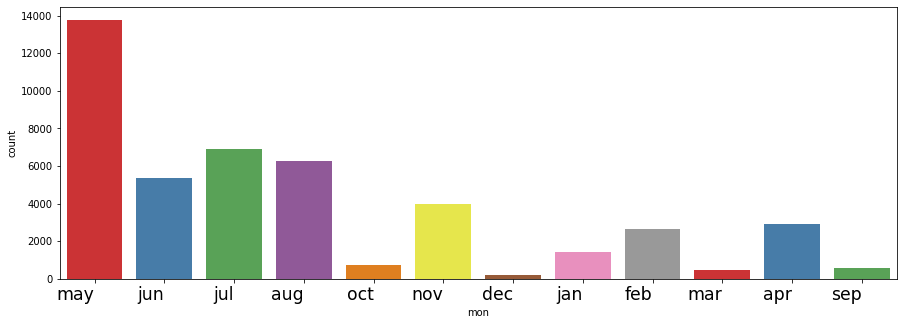

In [125]:
print('Number of people who take Insurance by month wise :')
plt.figure(figsize=(15,5))
sns.countplot(x = 'mon',data=data,palette = 'Set1')
plt.xticks( horizontalalignment='right',fontweight='light',fontsize='xx-large') 
data['mon'].value_counts(normalize = True)

<AxesSubplot:ylabel='mon'>

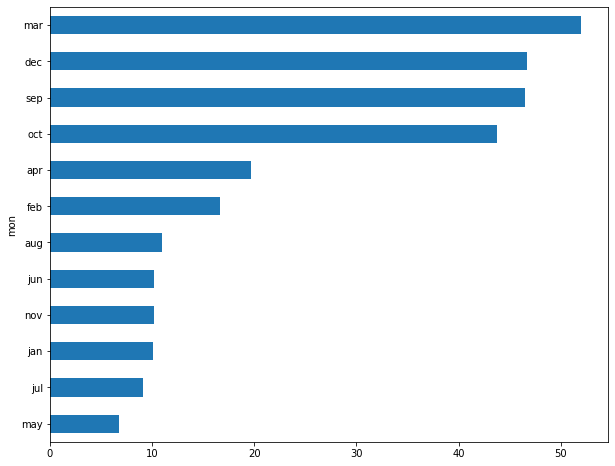

In [126]:
plt.figure(figsize=(10,8))
(data.groupby('mon')['target'].mean()*100).sort_values().plot(kind = 'barh')

1. In feature table we see that most of the calls are done in may but our sales is low in may 
2.We should focus on doing calls in February and march to get more insurances it will improve business more in march only  

Number of people who take Insurance by prev_outcome  :


unknown    0.817454
failure    0.108417
other      0.040703
success    0.033426
Name: prev_outcome, dtype: float64

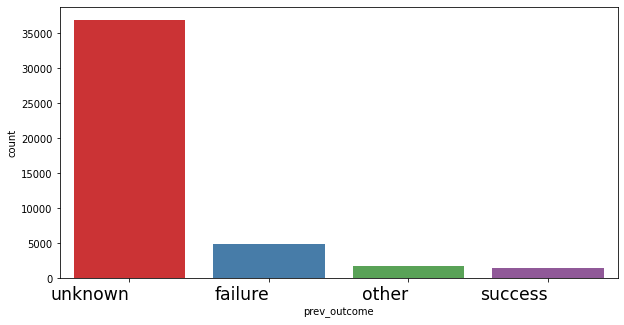

In [127]:
print('Number of people who take Insurance by prev_outcome  :')
plt.figure(figsize=(10,5))
sns.countplot(x = 'prev_outcome',data=data,palette = 'Set1')
plt.xticks( horizontalalignment='right',fontweight='light',fontsize='xx-large') 
data['prev_outcome'].value_counts(normalize = True)

<AxesSubplot:ylabel='prev_outcome'>

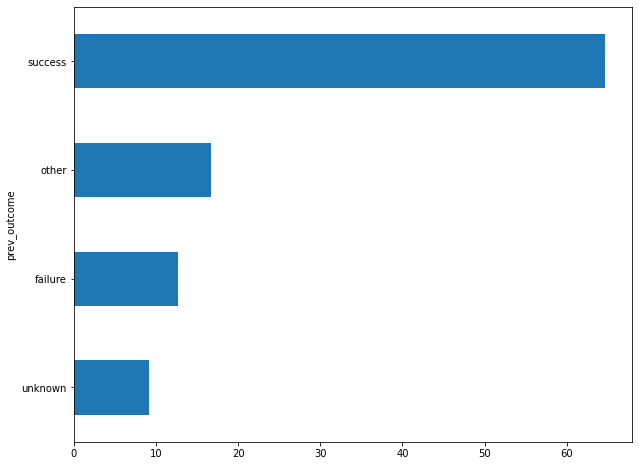

In [128]:
plt.figure(figsize=(10,8))
(data.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind = 'barh')

1. If we focus on doing calls to above people we should get this type or more high success results in future 

Number of people who take Insurance by yes(Insurance accepted) or no(insurance not accepted)  :


no     0.883
yes    0.117
Name: y, dtype: float64

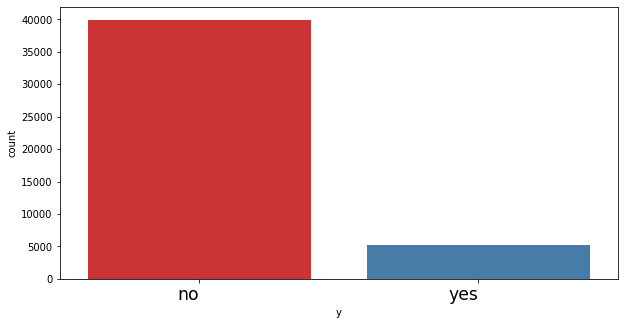

In [129]:
print('Number of people who take Insurance by yes(Insurance accepted) or no(insurance not accepted)  :')
plt.figure(figsize=(10,5))
sns.countplot(x = 'y',data=data,palette = 'Set1')
plt.xticks( horizontalalignment='right',fontweight='light',fontsize='xx-large') 
data['y'].value_counts(normalize = True)

In [130]:
px.histogram (data,x='age',  title = 'age vs y')

<AxesSubplot:ylabel='age'>

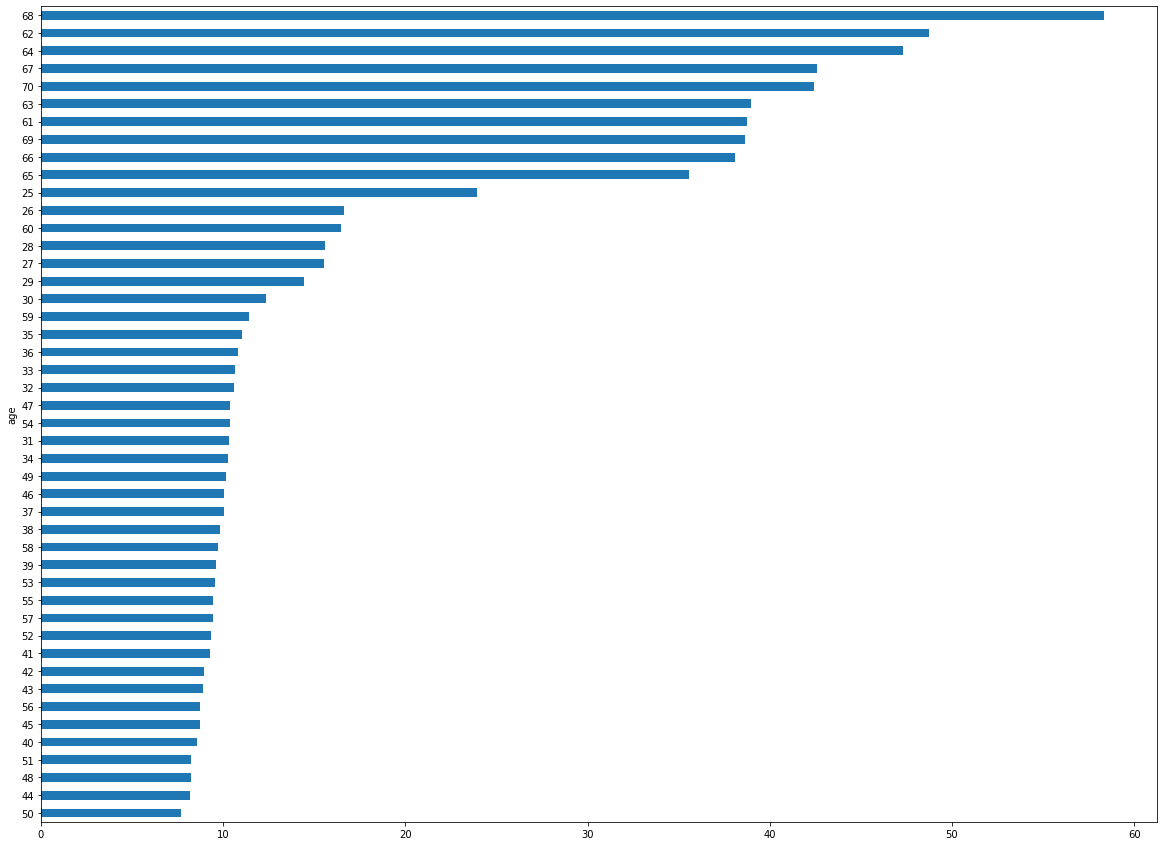

In [131]:
plt.figure(figsize=(20,15))
(data.groupby('age')['target'].mean()*100).sort_values().plot(kind = 'barh')

In [132]:
px.histogram(data,x='day',  title = 'day  vs target')

<AxesSubplot:ylabel='day'>

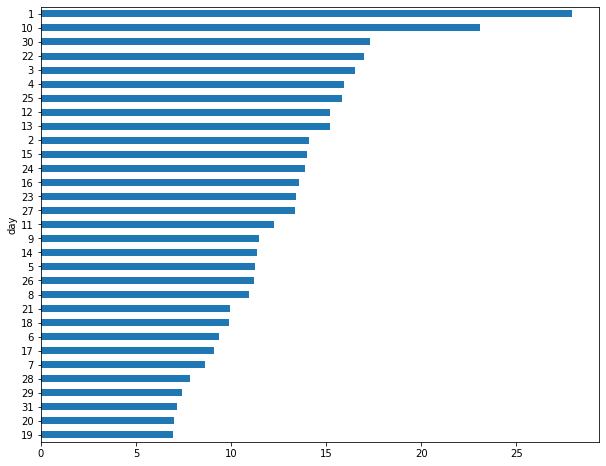

In [133]:
plt.figure(figsize=(10,8))
(data.groupby('day')['target'].mean()*100).sort_values().plot(kind = 'barh')

In [134]:
#sns.boxplot(data,x='target',y= 'dur')

In [135]:
px.histogram(data, x='dur',  title = 'duration  vs Target' )

In [136]:
#plt.figure(figsize=(10,8))
#(data.groupby('dur')['target'].mean()*100).sort_values().plot(kind = 'barh')

In [137]:
px.histogram(data,x='num_calls',  title = 'day  vs y' )

<AxesSubplot:ylabel='num_calls'>

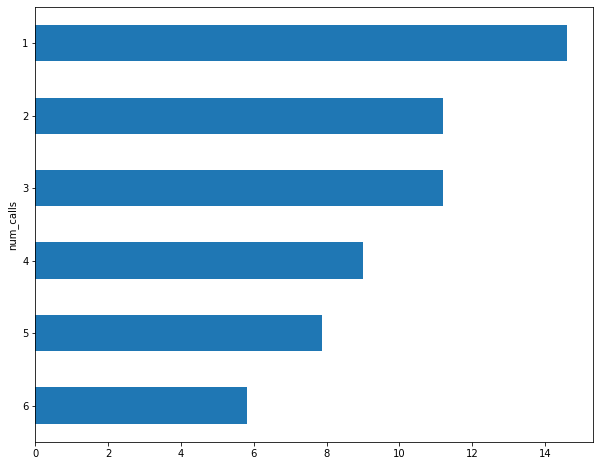

In [138]:
plt.figure(figsize=(10,8))
(data.groupby('num_calls')['target'].mean()*100).sort_values().plot(kind = 'barh')

# **Encoding**

## **Label Encoding**

In [139]:
data['y']=data['y'].map({'yes':1,'no':0}) #label encoding

data['job'] = data['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})

data['marital'] = data['marital'].map({'married' : 0,'divorced':1,'single': 2,}) #label encoding

data['education_qual'] = data['education_qual'].map({'primary':0,'secondary':1,'tertiary':2}) #label encoding

data['mon'] = data['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11}) #label encoding

data['call_type'] = data['call_type'].map({'unknown':0,'telephone':1,'cellular':2})

data['prev_outcome'] = data['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})

In [140]:
data.sample(10)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
33258,25,0,2,0,2,20,7,59,2,1,0,0
14474,37,6,0,1,2,14,1,235,3,0,0,0
7120,40,0,0,1,0,29,0,134,1,0,0,0
29477,50,0,2,0,2,3,6,294,1,2,0,0
42062,61,7,0,2,2,29,8,377,1,2,1,1
28693,26,2,0,2,2,30,2,169,3,0,0,0
41388,25,4,2,1,2,1,9,86,1,0,0,0
44487,60,4,0,1,2,9,5,265,1,3,1,1
36116,37,3,0,1,2,11,0,152,1,0,0,0
41472,36,3,0,1,2,7,9,351,1,3,1,1


In [141]:
data['y'].unique()

array([0, 1])

In [142]:
data.shape

(45205, 12)

# **Spliting the data into train and test**

In [143]:
from sklearn.model_selection import train_test_split,GridSearchCV ,StratifiedKFold# importing train test split

x = data.drop(['y','target'],axis = 1) #features 
y = data['y']# Target variables 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=7,stratify=y)

# **IMBALANCE Learning**


### **SMOTEENN**

In [144]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN(sampling_strategy= 'all',random_state = 7)

x_senn , y_senn = smote.fit_resample(x_train,y_train)

x_senn.shape , y_senn.shape

((50285, 10), (50285,))

# **LogisticRegression**

In [145]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,accuracy_score
lr = LogisticRegression(random_state = 7)
lr.fit(x_senn,y_senn)

y_pred_lr = lr.predict(x_test)


print('accuracy score : ',accuracy_score(y_pred_lr,y_test))
print('Auroc score is :',roc_auc_score(y_test,y_pred_lr))
print('Auroc score predict_proba',roc_auc_score(y_test,lr.predict_proba(x_test)[:,1]))

accuracy score :  0.7287205804282428
Auroc score is : 0.7965193624768446
Auroc score predict_proba 0.871803592055518


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# **DecisionTreeClassifier**

In [146]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 7,max_depth =9,criterion ='log_loss',min_samples_split=200)
dtc.fit(x_senn,y_senn)
y_pred_dtc = dtc.predict(x_test)

print('accuracy score : ',accuracy_score(y_pred_dtc,y_test))
print('Auroc score is :',roc_auc_score(y_test,y_pred_dtc))
print('Auroc score predict_proba',roc_auc_score(y_test,dtc.predict_proba(x_test)[:,1]))

accuracy score :  0.7902141213944435
Auroc score is : 0.8421667844008744
Auroc score predict_proba 0.9005560667477163


# **KNeighborsClassifier**

In [147]:
from sklearn.neighbors import KNeighborsClassifier

knn  = KNeighborsClassifier(16)

knn.fit(x_senn,y_senn)

y_pred_knn = knn.predict(x_test)
print('accuracy score : ',accuracy_score(y_pred_knn,y_test))
print('Auroc score is :',roc_auc_score(y_test,y_pred_knn))
print('Auroc score predict_proba',roc_auc_score(y_test,knn.predict_proba(x_test)[:,1]))

accuracy score :  0.7274818616174128
Auroc score is : 0.7695687896216032
Auroc score predict_proba 0.8392296696266967


# **BaggingClassifier**

In [148]:
from sklearn.ensemble import BaggingClassifier # bagging 
bagging_model = BaggingClassifier(DecisionTreeClassifier(max_depth = 15,random_state=7),n_estimators=100) # using DecisionTreeClassifier 
bagging_model.fit(x_senn,y_senn)
#bagging_model.score(x_test_scaled,y_test)
y_pred_br = bagging_model.predict(x_test)

print('accuracy score : ',accuracy_score(y_test,y_pred_br))
print('Auroc score :',roc_auc_score(y_test,y_pred_br))

accuracy score :  0.8218899309856662
Auroc score : 0.8476343003707869


# **GridSearchCv**

In [149]:
'''from sklearn.model_selection import GridSearchCV

params = {'learning': [0.01,0.02,0.04,0.06,0.08],
          'max_depth':[1,3,5,7,9,10],
          'max_features':[4,6,7,8,9],
          'estimators':[20,30,40,50,90,100]}

grid = GridSearchCV(xgb,param_grid = params,cv = 5,verbose = 0,n_jobs = 4)
grid.fit(x_senn,y_senn)
print('Train score'+str(grid.score(x_senn,y_senn)))
print('Train score'+str(grid.score(x_test,y_test)))

print(grid.best_params_)
print(grid.best_estimator_)'''

"from sklearn.model_selection import GridSearchCV\n\nparams = {'learning': [0.01,0.02,0.04,0.06,0.08],\n          'max_depth':[1,3,5,7,9,10],\n          'max_features':[4,6,7,8,9],\n          'estimators':[20,30,40,50,90,100]}\n\ngrid = GridSearchCV(xgb,param_grid = params,cv = 5,verbose = 0,n_jobs = 4)\ngrid.fit(x_senn,y_senn)\nprint('Train score'+str(grid.score(x_senn,y_senn)))\nprint('Train score'+str(grid.score(x_test,y_test)))\n\nprint(grid.best_params_)\nprint(grid.best_estimator_)"

# **XGBClassifier**

In [150]:
import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth = 5,
                        learning_rate= 0.15,
                        min_child_weight=7,
                        gamma = 0.3,
                        colsample_bytree = 0.4,
                        n_estimators = 250)
xgb.fit(x_senn,y_senn) 

y_pred_x = xgb.predict(x_test)

y_train_pred = xgb.predict(x_senn)



print('train accuracy score : ',accuracy_score(y_senn,y_train_pred))
print('test accuracy score : ',accuracy_score(y_test,y_pred_x))
print('Auroc score :',roc_auc_score(y_test,y_pred_x)) 
print('Auroc score predict_probability',roc_auc_score(y_test,xgb.predict_proba(x_test)[:,1]))

train accuracy score :  0.9609028537337178
test accuracy score :  0.8284374447000531
Auroc score : 0.857247778461613
Auroc score predict_probability 0.9218352362819437


In [151]:
'''from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param = { 
    'min_child_weight' : [1,2,3,4,5,6,7,8,9,10,11],
    'max_depth'       : [3,4,5,6,8,10,11,12,15],
    'min_child_weight' :[1,3,5,7,9],
    'gamma'            :[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree' : [0.3,0.4,0.5,0.7]
}
grid_search = GridSearchCV(estimator =xgb,param_grid =param,scoring='roc_auc',n_jobs = -1,cv =5,verbose = 3)

grid_search =grid_search.fit(x_train,y_train)
grid_search.best_params_'''

"from sklearn.model_selection import GridSearchCV,RandomizedSearchCV\n\nparam = { \n    'min_child_weight' : [1,2,3,4,5,6,7,8,9,10,11],\n    'max_depth'       : [3,4,5,6,8,10,11,12,15],\n    'min_child_weight' :[1,3,5,7,9],\n    'gamma'            :[0.0,0.1,0.2,0.3,0.4],\n    'colsample_bytree' : [0.3,0.4,0.5,0.7]\n}\ngrid_search = GridSearchCV(estimator =xgb,param_grid =param,scoring='roc_auc',n_jobs = -1,cv =5,verbose = 3)\n\ngrid_search =grid_search.fit(x_train,y_train)\ngrid_search.best_params_"

# **AdaBoostClassifier**

In [152]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators = 10,learning_rate = 1,random_state = 7)
abc.fit(x_senn,y_senn)

y_pred_abc = abc.predict(x_test)


print('test accuracy score : ',accuracy_score(y_test,y_pred_abc))
print('Auroc score :',roc_auc_score(y_test,y_pred_abc)) 
print('Auroc score predict_proba',roc_auc_score(y_test,abc.predict_proba(x_test)[:,1]))

test accuracy score :  0.7779154132012033
Auroc score : 0.8063287694905695
Auroc score predict_proba 0.8811696388237897


# **GradientBoostingClassifier**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state = 7,n_estimators = 500)

gbc.fit(x_senn,y_senn)
y_pred_gbc = abc.predict(x_test)

print('test accuracy score : ',accuracy_score(y_test,y_pred_gbc))
print('Auroc score :',roc_auc_score(y_test,y_pred_gbc)) 
print('Auroc score predict_proba',roc_auc_score(y_test,gbc.predict_proba(x_test)[:,1]))

test accuracy score :  0.7779154132012033
Auroc score : 0.8063287694905695
Auroc score predict_proba 0.9181120182877099


# **RandomForestClassifier**

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100,max_depth= 15, max_features = 'sqrt')
                            
rf.fit(x_senn,y_senn)
y_pred_rf = rf.predict(x_test)


print('accuracy score : ',accuracy_score(y_test,y_pred_rf))
print('Auroc score is :',roc_auc_score(y_test,y_pred_rf))
print('Auroc score predict_proba',roc_auc_score(y_test,rf.predict_proba(x_test)[:,1]))

accuracy score :  0.8154308971863387
Auroc score is : 0.8584140292688252
Auroc score predict_proba 0.9143474922613761


# **MAX VOTING**

# **Ensemble - VotingClassifie**

In [69]:
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

model1 = RandomForestClassifier(random_state = 7,
                            n_estimators= 400,
                            max_samples = 0.2,
                            max_features=0.8,
                            max_depth=16,
                            criterion= 'entropy')
model2 = KNeighborsClassifier(n_neighbors=8,metric='manhattan')
model3 = xgb.XGBClassifier(max_depth = 5,learning_rate= 0.15,min_child_weight=7,gamma = 0.3,colsample_bytree = 0.4,n_estimators = 250)
model4 = BaggingClassifier(DecisionTreeClassifier(max_depth = 15,random_state=7),n_estimators=100)

# t will stitich all the models together, voting = hard means max voting
model = VotingClassifier(estimators = [('rf',model1),('knn',model2),('xgb',model3),('br',model4)],voting = 'soft')
model.fit(x_senn,y_senn) # fitting the model
#model.score(x_test_scaled,y_test) #prediction
y_pred_v = model.predict(x_test)

print('accuracy score : ',accuracy_score(y_test,y_pred_v))
print('Auroc score :',roc_auc_score(y_test,y_pred_v))
print(' confusion_matrix :',confusion_matrix(y_test,y_pred_v))

accuracy score :  0.8125110599893824
Auroc score : 0.8524952325225336
 confusion_matrix : [[7987 1993]
 [ 126 1196]]


In [70]:
rf.feature_importances_

array([0.05713241, 0.03906318, 0.01008109, 0.01084422, 0.06312925,
       0.06798311, 0.13152471, 0.52307686, 0.05141352, 0.04575164])

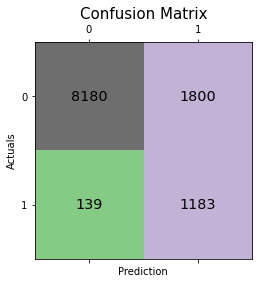

In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test,y_pred = y_pred_x)
ax = plt.subplot()
ax.matshow(cm,cmap = plt.cm.Accent,alpha = 0.95)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x = j,y =i ,s = cm[i,j], va = 'center',ha ='center',size = 'x-large')
plt.xlabel('Prediction',fontsize =10)
plt.ylabel('Actuals',fontsize = 10)
plt.title('Confusion Matrix',fontsize = 15)
plt.show()

In [72]:
fianl_data = pd.DataFrame({'Model':["Lr",'dt','rf','xgb','knn','gb','voting'],
                           "Auroc score":[roc_auc_score(y_test,y_pred_lr),
                                         roc_auc_score(y_test,y_pred_dtc),
                                         roc_auc_score(y_test,y_pred_rf),
                                         roc_auc_score(y_test,y_pred_x),
                                         roc_auc_score(y_test,y_pred_knn),
                                         roc_auc_score(y_test,y_pred_gbc),
                                         roc_auc_score(y_test,y_pred_v)]})

fianl_data

,Model,Auroc score
0,Lr,0.796519
1,dt,0.842167
2,rf,0.858414
3,xgb,0.857248
4,knn,0.769569
5,gb,0.806329
6,voting,0.852495


In [73]:
import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth = 5,
                        learning_rate= 0.15,
                        min_child_weight=7,
                        gamma = 0.3,
                        colsample_bytree = 0.4,
                        n_estimators = 250)
xgb.fit(x_senn,y_senn) 

y_pred_x = xgb.predict(x_test)

y_train_pred = xgb.predict(x_senn)



print('train accuracy score : ',accuracy_score(y_senn,y_train_pred))
print('test accuracy score : ',accuracy_score(y_test,y_pred_x))
print('Auroc score :',roc_auc_score(y_test,y_pred_x)) 
print('Auroc score predict_probability',roc_auc_score(y_test,xgb.predict_proba(x_test)[:,1]))

train accuracy score :  0.9609028537337178
test accuracy score :  0.8284374447000531
Auroc score : 0.857247778461613
Auroc score predict_probability 0.9218352362819437


In [74]:
xgb.feature_importances_

array([0.03831133, 0.04498024, 0.03327311, 0.03129123, 0.20093745,
       0.04381689, 0.12826271, 0.27835864, 0.10665551, 0.09411291],
      dtype=float32)

<Figure size 720x576 with 0 Axes>

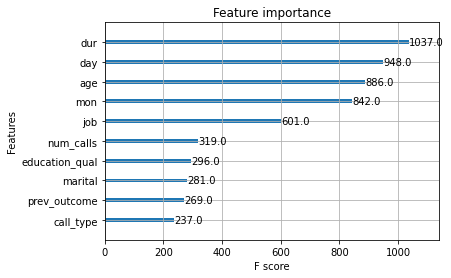

In [75]:
from xgboost import plot_importance

# plot feature importance
plt.figure(figsize =(10,8))
plot_importance(xgb)
plt.show()

# **Important Features**

In [76]:
imp = data.drop(['call_type','prev_outcome','marital','education_qual','num_calls','y','target'],axis = 1)

In [77]:
#spliting the data into train and test
x_train_,x_test_,y_train_,y_test_ = train_test_split(imp,y,test_size = 0.25,stratify= y,random_state = 7)

In [78]:
x_train_.shape,x_test_.shape

((33903, 5), (11302, 5))

In [79]:
x_train_

,age,job,day,mon,dur
12069,53,5,20,4,12
13167,59,0,8,1,165
37610,52,7,14,0,161
24356,54,7,17,3,98
34379,27,7,4,0,143
...,...,...,...,...,...
17462,60,5,28,1,178
31830,33,0,8,7,249
41245,29,7,24,5,130
36779,34,3,12,0,230


In [80]:
# apply SMOTEENN 

smote = SMOTEENN(sampling_strategy ='all',random_state=7)
x_senn1,y_senn1= smote.fit_resample(x_train_,y_train_)

In [81]:
x_senn1.shape,y_senn1.shape

((48242, 5), (48242,))

In [82]:
import xgboost as xgb

xgb = xgb.XGBClassifier(max_depth = 5,
                        learning_rate= 0.15,
                        min_child_weight=7,
                        gamma = 0.3,
                        colsample_bytree = 0.4,
                        n_estimators = 250)

xgb.fit(x_senn1,y_senn1)

y_pred_imp = xgb.predict(x_test_)


print('accuracy score : ',accuracy_score(y_test_,y_pred_imp))
print('Auroc score :',roc_auc_score(y_test_,y_pred_imp))
print('Auroc score predict_proba',roc_auc_score(y_test_,xgb.predict_proba(x_test_)[:,1]))
print(' confusion_matrix :',confusion_matrix(y_test_,y_pred_imp))

accuracy score :  0.7942841974871704
Auroc score : 0.8270813184614312
Auroc score predict_proba 0.8952628403554461
 confusion_matrix : [[7827 2153]
 [ 172 1150]]


# **If we see that we take top 5 feature from the data we get the auroc score is to be 0.82**

# **Making a Prediction System**

In [83]:
#input_data =	(54,4,0,1,2,2,3,182,1,1)
  
input_data = (53,5,20,4,12)

#change the input data into numpy array
input_arr = np.array(input_data)


# reshape the array as we are Predicting for one instance
input_reshape = input_arr.reshape(1,-1)

prediction = xgb.predict(input_reshape)
print(prediction)

if (prediction[0] == 0):
  print('The person will not take Insurance')

else:
  print('The person will take Insurance')

[0]
The person will not take Insurance


# **Saving the Training model**

In [84]:
import pickle

filename = 'train_model.sav'

pickle.dump(xgb,open(filename,'wb'))


In [85]:
#loading the saved model

load_model  = pickle.load(open('train_model.sav','rb'))

In [86]:
#input_data =	(54,4,0,1,2,2,3,182,1,1)
  
input_data = (53,5,20,4,12)

#change the input data into numpy array
input_arr = np.array(input_data)


# reshape the array as we are Predicting for one instance
input_reshape = input_arr.reshape(1,-1)

prediction = load_model.predict(input_reshape)
print(prediction)

if (prediction[0] == 0):
  print('The person will not take Insurance')

else:
  print('The person will take Insurance')

[0]
The person will not take Insurance
